In [240]:
import pandas as pd
import numpy as np

#visulization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import scikitplot as skplt

import warnings
warnings.filterwarnings("ignore")

In [4]:
# import users data
users = pd.read_csv('takehome_users.csv',encoding='latin-1')

In [5]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [189]:
# import engagement data 
engagement = pd.read_csv('takehome_user_engagement.csv')

In [190]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [191]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [192]:
# change time_stamp to datetime formate and set to index
engagement.time_stamp= pd.to_datetime(engagement.time_stamp)
engagement.set_index('time_stamp',inplace=True)

In [193]:
# groupby user_id and resample to 1 week,sum the period
week_users = engagement.groupby('user_id').resample('1w').sum().drop('user_id',axis=1)

In [194]:
# remove the invaild entries that we made during resampling
week_users=week_users[week_users.visited !=0]

In [196]:
# get all the user_id visied at leat 3 times per week and add a column defined them as'adopted_user'
week_users.reset_index(inplace=True)
adopt_users= week_users[df_week.visited>=3].drop('time_stamp',axis=1)
adopt_users.set_index('user_id',inplace=True)
adopt_users = adopt_users.groupby('user_id').sum().drop('visited',axis=1)
adopt_users['adopted_user']=1

In [247]:
merged_users = users.merge(adopt_users,how='left',left_on='object_id',right_on='user_id')

In [248]:
merged_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN


In [249]:
merged_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  1445 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [250]:
merged_users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                  float64
dtype: object

In [251]:
# change column to datetime formate
merged_users['creation_time']= pd.to_datetime(merged_users['creation_time'])
merged_users['last_session_creation_time']= pd.to_datetime(merged_users['last_session_creation_time'])

In [252]:
# check the null values in last_session_creation_time column
merged_users[merged_users.last_session_creation_time.isnull()].head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,NaN
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0,NaN
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,NaN,NaN
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,NaN,NaN


In [253]:
# check the null values in invied_by_user_id column
merged_users[merged_users.invited_by_user_id.isnull()].head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1970-01-01 00:00:01.356009872,0,1,37,NaN,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,NaN
10,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1970-01-01 00:00:01.388116554,0,0,69,NaN,NaN
13,14,2012-10-11 16:14:33,Rivera Bret,BretKRivera@gmail.com,SIGNUP,1970-01-01 00:00:01.350058473,0,0,0,NaN,NaN


In [254]:
# filling null values in merged_users dataframe
merged_users.last_session_creation_time.fillna(merged_users['creation_time'], inplace=True)
merged_users['invited_by_user_id'].fillna(0, inplace=True)
merged_users['adopted_user'].fillna(0, inplace=True)

In [255]:
# check for null values
merged_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted_user                  12000 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 1.1+ MB


In [256]:
#get dummy values on feature columns
merged_users = pd.get_dummies(merged_users,columns=['creation_source','org_id'],drop_first=True)

In [257]:
# set up model and train, test data
model = merged_users.drop(['name','email'],axis=1)

In [265]:
model.creation_time=model.creation_time.astype('int64')
model.last_session_creation_time=model.last_session_creation_time.astype('int64')

In [263]:
model.head()

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted_user,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
0,1,1398138810000000000,1398138810,1,0,10803.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1384487104000000000,1396237504,0,0,316.0,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1363734892000000000,1363734892,0,0,1525.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1369123768000000000,1369210168,0,0,5151.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1358417660000000000,1358849660,0,0,5240.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
X= model.drop('adopted_user',axis=1)
y = model['adopted_user']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [267]:
# using Ramdom forest classifier
# GirdSearch
random_gird={'max_depth':[10,30,50,70],
             'min_samples_leaf':[1,2,4,6],
              'max_features':['auto','sqrt','log2']}
rf_clf = RandomForestClassifier()
rf_cv = GridSearchCV(rf_clf, random_gird,cv = 5)

In [268]:
rf_cv.fit(X_train, y_train)
print('best parameter:{}'.format(rf_cv.best_params_),'best score:{}'.format(rf_cv.best_score_))

best parameter:{'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1} best score:0.9629761904761904


In [277]:
# fit the data with best model
rf_clf = RandomForestClassifier(max_depth=50 ,max_features= 'auto' ,min_samples_leaf= 1)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

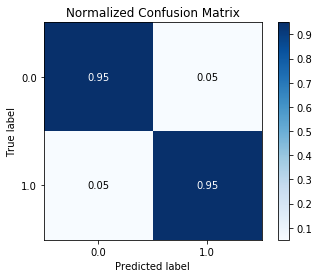

In [278]:
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(rf_clf.predict(X_test), y_test, normalize=True)
plt.show()

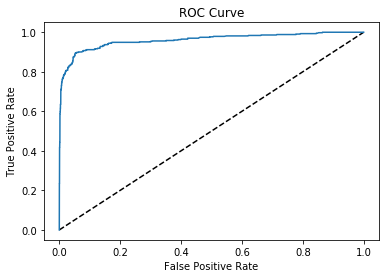

In [280]:
#plot ROC curve
y_pred_prob= rf_clf.predict_proba(X_test)[:,1]

fpr,tpr,thresholds =metrics.roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [281]:
# classification report
print(classification_report(rf_clf.predict(X_test), y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      3310
         1.0       0.64      0.95      0.76       290

    accuracy                           0.95      3600
   macro avg       0.82      0.95      0.87      3600
weighted avg       0.97      0.95      0.96      3600



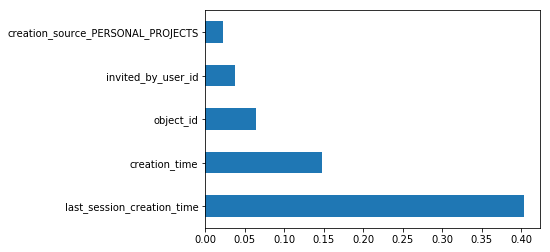

In [282]:
# important features
feature_importance= pd.Series(rf_clf.feature_importances_,index=X_train.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()